In [13]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
    custom_plots,
    compress_repeated_epochs
)
from ripple_heterogeneity.assembly import assembly_reactivation,find_sig_assembly
from ripple_heterogeneity.readout import assembly_multi_region
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator
import nelpy.plotting as npl
functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [2]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")

region_df = pd.DataFrame()
for basepath in df.basepath:
    brainRegions = loading.load_brain_regions(basepath)
    temp_df = pd.DataFrame()
    temp_df["brainRegions"] = brainRegions.keys()
    temp_df["basepath"] = basepath
    region_df = pd.concat([region_df, temp_df], ignore_index=True)

sessions = region_df[region_df.brainRegions.str.contains("PFC|EC1|EC2|EC3|EC4|EC5|MEC")]
df_sessions = pd.DataFrame()
df_sessions["basepath"] = sessions.basepath.unique()
df_sessions

,basepath
0,Z:\Data\AYAold\AYA10\day12
1,Z:\Data\AYAold\AYA7\day19
2,Z:\Data\AYAold\AYA7\day20
3,Z:\Data\AYAold\AYA7\day24
4,Z:\Data\AYAold\AYA7\day25
...,...
114,Z:\Data\Kenji\i01_maze15_MS.001_004
115,Z:\Data\Kenji\nlx_070329
116,Z:\Data\ORproject\OR18\day1
117,Z:\Data\ORproject\OR18\day2


In [27]:
regions="CA1|PFC|EC1|EC2|EC3|EC4|EC5|MEC"  # brain regions to load
putativeCellType="Pyr"  # type of cells to load (can be multi ex. Pyr|Int)
weight_dt=0.05  # dt in seconds for binning st to get weights for each assembly
z_mat_dt=60

basepath = r"Z:\Data\HMC1\day8"

m1 = assembly_reactivation.AssemblyReact(
    basepath,
    brainRegion=regions,
    putativeCellType=putativeCellType,
    weight_dt=weight_dt,
    z_mat_dt=z_mat_dt,
)
m1.load_data()
m1.get_weights(epoch=m1.epochs[1])
assembly_act = m1.get_assembly_act()


In [52]:
regions="CA1|PFC"  # brain regions to load
putativeCellType="Pyr"  # type of cells to load (can be multi ex. Pyr|Int)
weight_dt=0.05  # dt in seconds for binning st to get weights for each assembly
z_mat_dt=60

basepath = r"Z:\Data\HMC1\day8"

m1 = assembly_reactivation.AssemblyReact(
    basepath,
    brainRegion=regions,
    putativeCellType=putativeCellType,
    weight_dt=weight_dt,
    z_mat_dt=z_mat_dt,
)
m1.load_data()
m1.get_weights(epoch=m1.epochs[1])
assembly_act_ = m1.get_assembly_act()


<AnalogSignalArray at 0x2b9762e3820: 41 signals> for a total of 6:36:00 hours

In [51]:
prop_df, assembly_df, keep_assembly = assembly_multi_region.compile_results_df({"react":m1})
assembly_act._data = assembly_act.data[keep_assembly]

assembly_df

c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars


,patterns,is_member_sig,assembly_n,UID,putativeCellType,brainRegion,deepSuperficial,deepSuperficialDistance
0,-0.068338,False,0,2,Pyramidal Cell,PFC,unknown,NaN
1,-0.102272,False,0,4,Pyramidal Cell,PFC,unknown,NaN
2,0.032081,False,0,7,Pyramidal Cell,PFC,unknown,NaN
3,-0.007987,False,0,8,Pyramidal Cell,PFC,unknown,NaN
4,-0.024445,False,0,9,Pyramidal Cell,PFC,unknown,NaN
...,...,...,...,...,...,...,...,...
4123,-0.024597,False,15,350,Pyramidal Cell,MEC,unknown,NaN
4124,0.003704,False,15,351,Pyramidal Cell,MEC,unknown,NaN
4125,0.023999,False,15,352,Pyramidal Cell,MEC,unknown,NaN
4126,0.012078,False,15,353,Pyramidal Cell,MEC,unknown,NaN


In [ ]:
assembly_act

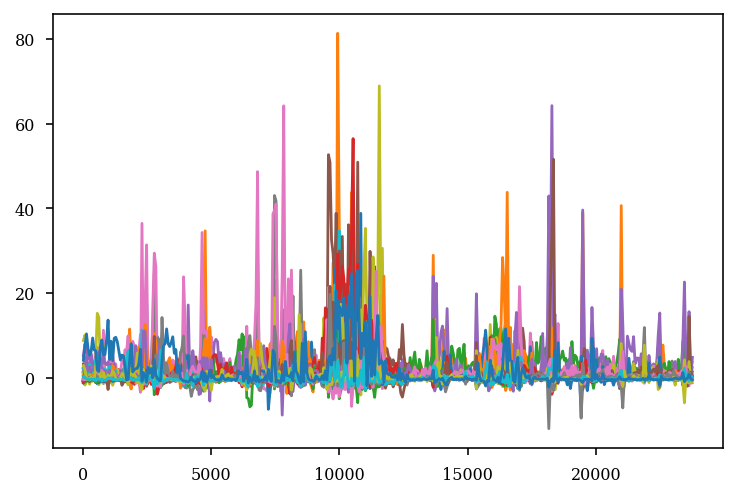

In [28]:
plt.plot(assembly_act.abscissa_vals, assembly_act.data.T)
# npl.epochplot(m1.epochs)
plt.show()

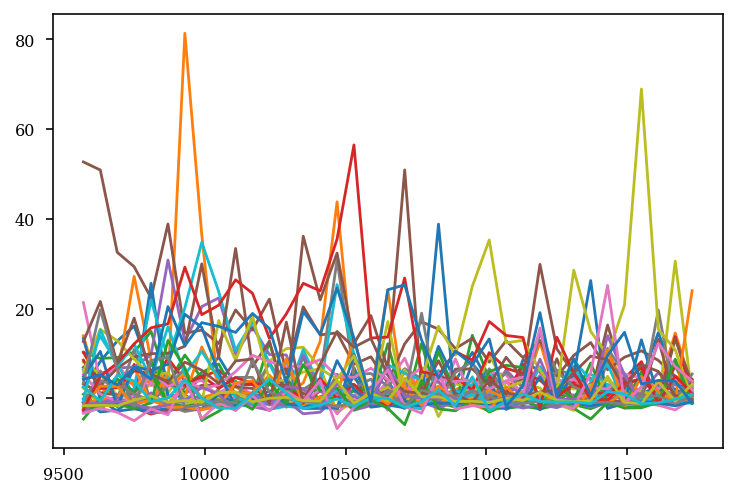

In [29]:
plt.plot(assembly_act[m1.epochs[1]].abscissa_vals, assembly_act[m1.epochs[1]].data.T)
plt.show()

In [ ]:
assembly_act.std(axis=0)

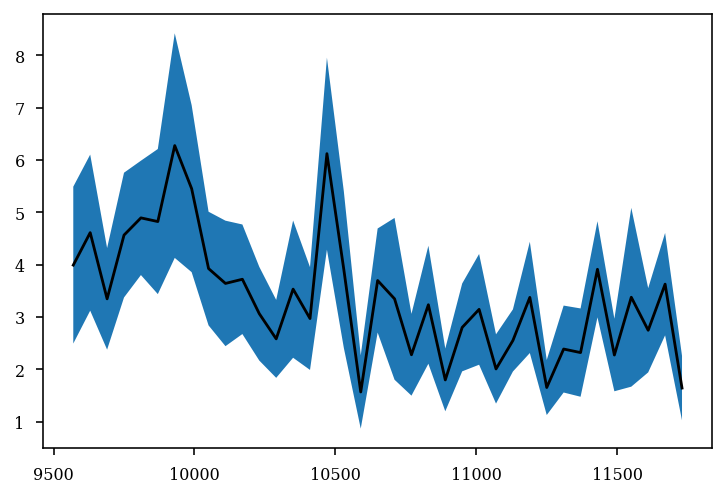

In [45]:
plt.plot(assembly_act[m1.epochs[1]].abscissa_vals, assembly_act[m1.epochs[1]].mean(axis=0),color="k")
y = assembly_act[m1.epochs[1]].mean(axis=0)
error = assembly_act[m1.epochs[1]].std(axis=0) / np.sqrt(assembly_act.n_signals)
plt.fill_between(assembly_act[m1.epochs[1]].abscissa_vals, y-error, y+error, zorder=-1000)

plt.show()

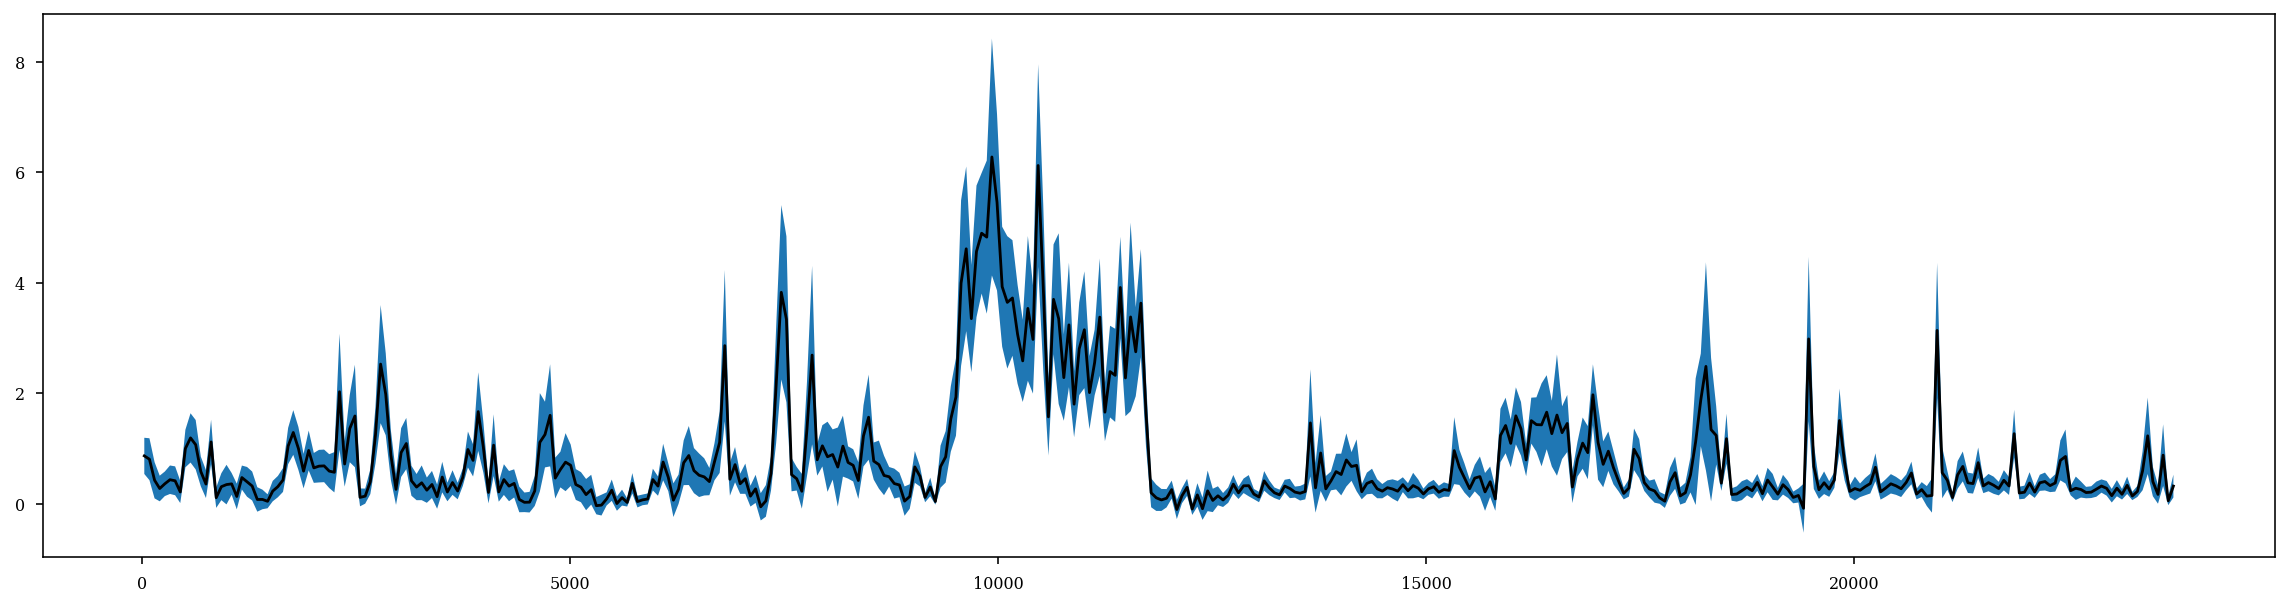

In [48]:
plt.figure(figsize=(20,5))
plt.plot(assembly_act.abscissa_vals, assembly_act.mean(axis=0),color="k")
y = assembly_act.mean(axis=0)
error = assembly_act.std(axis=0) / np.sqrt(assembly_act.n_signals)
plt.fill_between(assembly_act.abscissa_vals, y-error, y+error, zorder=-1000)

plt.show()

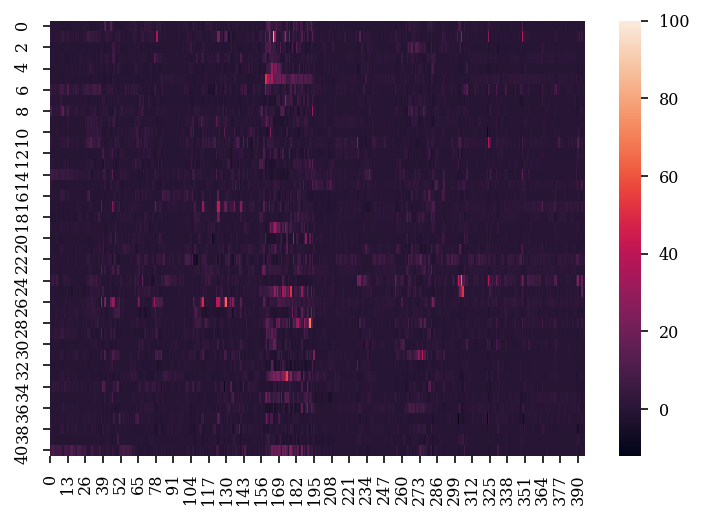

In [30]:
sns.heatmap(assembly_act.data,vmax=100)
plt.show()

In [ ]:
# save_path = (r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_50ms_dt_10ms_z_dt")

# batch_analysis.run(
#     sessions,
#     save_path,
#     assembly_multi_region.run,
#     parallel=True,
#     overwrite=False,
#     verbose=True,
#     skip_if_error=False,
#     weight_dt=.05,
#     z_mat_dt=0.01
# )
# # load results
# prop_df, assembly_df, df_strength = assembly_multi_region.load_results(save_path)